In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

sns.set()
%matplotlib inline

In [2]:
#OHCO = ["artist", "title","sent_num", "genre"]
OHCO = ["genre", "sent_num"]

salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [3]:
TOKENS = pd.read_csv("TOKENS.csv").set_index(OHCO).sort_index()
LIB = pd.read_csv("LIB.csv").set_index("song_id")

In [4]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  
genre   sent_num           
country 0            3693  
        0            6864  
        0            2104  
        0            7291  
        0            1353

In [5]:
LIB.head()

,title,artist,year,song_file,genre
song_id,,,,,
1001,sugar,maroon5,2015,data/2015/pop/Sugar---maroon_5.txt,pop
1002,earnedit(fiftyshadesofgrey),theweeknd,2015,data/2015/pop/Earned_It_(Fifty_Shades_Of_Grey)...,pop
1003,cantfeelmyface,theweeknd,2015,data/2015/pop/Cant_Feel_My_Face---the_weeknd.txt,pop
1004,wanttowantme,jasonderulo,2015,data/2015/pop/Want_To_Want_Me---jason_derulo.txt,pop
1005,habits(stayhigh),tovelo,2015,data/2015/pop/Habits_(Stay_High)---tove_lo.txt,pop


## Get Lexicon

In [6]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [7]:
salex['polarity'] = salex.positive - salex.negative

## Get lexicon columns

In [8]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [9]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

In [10]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  
genre   sent_num           
country 0            3693  
        0            6864  
        0            2104  
        0            7291  
        0            1353

In [11]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [12]:
TOKENS[salex.columns].sample(10)

anger  anticipation  disgust  fear  joy  negative  \
genre     sent_num                                                      
rap       3           0.0           0.0      0.0   0.0  0.0       NaN   
pop       30          0.0           0.0      0.0   0.0  0.0       NaN   
rnbhiphop 21          0.0           0.0      0.0   0.0  0.0       NaN   
          54          0.0           0.0      0.0   0.0  0.0       NaN   
rap       106         0.0           0.0      0.0   0.0  0.0       NaN   
rnbhiphop 44          0.0           0.0      0.0   0.0  0.0       NaN   
pop       16          0.0           0.0      0.0   0.0  0.0       NaN   
rnbhiphop 46          0.0           0.0      0.0   0.0  0.0       NaN   
          15          0.0           1.0      0.0   0.0  1.0       0.0   
pop       14          0.0           0.0      0.0   0.0  0.0       NaN   

                    positive  sadness  surprise  trust  polarity  
genre     sent_num                                                
rap       3              NaN      0.0       0.0    0.0       0.0  
pop       30             NaN      0.0       0.0    0.0       0.0  
rnbhiphop 21             NaN      0.0       0.0    0.0       0.0  
          54             NaN      0.0       0.0    0.0       0.0  
rap       106            NaN      0.0       0.0    0.0       0.0  
rnbhiphop 44             NaN      0.0       0.0    0.0       0.0  
pop       16             NaN      0.0       0.0    0.0       0.0  
rnbhiphop 46             NaN      0.0       0.0    0.0       0.0  
          15             1.0      0.0       0.0    1.0       1.0  
pop       14             NaN      0.0       0.0    0.0       0.0

In [13]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  anticipation  disgust  fear  joy  sadness  \
genre     sent_num                                                              
rap       1          wheezy    0.0           0.0      0.0   0.0  0.0      0.0   
country   41            bad    1.0           0.0      1.0   1.0  0.0      1.0   
          11            and    0.0           0.0      0.0   0.0  0.0      0.0   
rap       7           eight    0.0           0.0      0.0   0.0  0.0      0.0   
rnbhiphop 35           with    0.0           0.0      0.0   0.0  0.0      0.0   
rap       71              i    0.0           0.0      0.0   0.0  0.0      0.0   
          6             got    0.0           0.0      0.0   0.0  0.0      0.0   
country   48          until    0.0           0.0      0.0   0.0  0.0      0.0   
pop       2             the    0.0           0.0      0.0   0.0  0.0      0.0   
          53             to    0.0           0.0      0.0   0.0  0.0      0.0   

                    surprise  trust  polarity  
genre     sent_num                             
rap       1              0.0    0.0       0.0  
country   41             0.0    0.0      -1.0  
          11             0.0    0.0       0.0  
rap       7              0.0    0.0       0.0  
rnbhiphop 35             0.0    0.0       0.0  
rap       71             0.0    0.0       0.0  
          6              0.0    0.0       0.0  
country   48             0.0    0.0       0.0  
pop       2              0.0    0.0       0.0  
          53             0.0    0.0       0.0

In [14]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [15]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  anger  anticipation  disgust  fear  joy  negative  \
genre   sent_num                                                               
country 0            3693    1.0           0.0      0.0   0.0  0.0       1.0   
        0            6864    0.0           0.0      0.0   0.0  0.0       NaN   
        0            2104    0.0           0.0      0.0   0.0  0.0       NaN   
        0            7291    0.0           0.0      0.0   0.0  0.0       NaN   
        0            1353    0.0           0.0      0.0   0.0  0.0       NaN   

                  positive  sadness  surprise  trust  polarity  
genre   sent_num                                                
country 0              0.0      0.0       0.0    0.0      -1.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0

# Sentiment by Genre

In [16]:
rnbhiphop = ("rnbhiphop")
country = ("country")
rap = ("rap")
pop = ("pop")

In [17]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  anger  anticipation  disgust  fear  joy  negative  \
genre   sent_num                                                               
country 0            3693    1.0           0.0      0.0   0.0  0.0       1.0   
        0            6864    0.0           0.0      0.0   0.0  0.0       NaN   
        0            2104    0.0           0.0      0.0   0.0  0.0       NaN   
        0            7291    0.0           0.0      0.0   0.0  0.0       NaN   
        0            1353    0.0           0.0      0.0   0.0  0.0       NaN   

                  positive  sadness  surprise  trust  polarity  
genre   sent_num                                                
country 0              0.0      0.0       0.0    0.0      -1.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0

In [18]:
def plot_sentiments(df):
    myfeatures = df[emo_cols].mean().sort_values().index.values.tolist()
    myfeatures.remove('polarity')
    #print(df[emo_cols].mean().sort_values())
    #print(plotpop[-4:] + ['polarity'])
    emo = myfeatures[-4:] + ['polarity']
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

In [19]:
RNBHIPHOP = TOKENS.loc[rnbhiphop].copy()
COUNTRY = TOKENS.loc[country].copy()
RAP = TOKENS.loc[rap].copy()
POP = TOKENS.loc[pop].copy()

<AxesSubplot:>

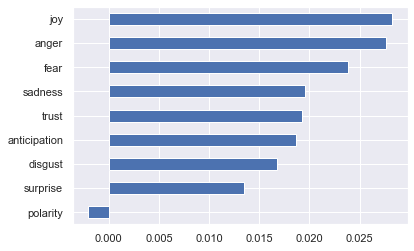

In [20]:
RNBHIPHOP[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

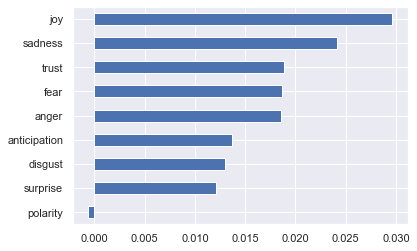

In [21]:
COUNTRY[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

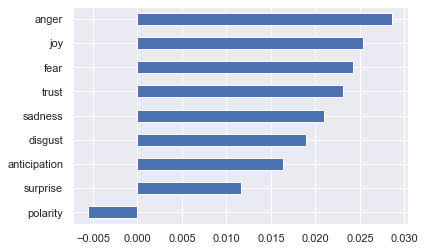

In [22]:
RAP[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

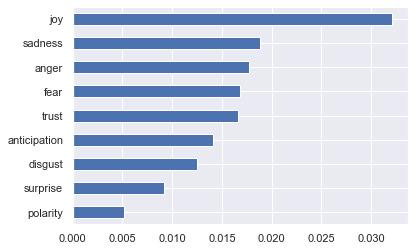

In [23]:
POP[emo_cols].mean().sort_values().plot.barh()

# Sentiment by Lyric

In [24]:
RNBHIPHOP = TOKENS.loc[rnbhiphop].copy()
COUNTRY = TOKENS.loc[country].copy()
RAP = TOKENS.loc[rap].copy()
POP = TOKENS.loc[pop].copy()

In [25]:
RNBHIPHOP.head()

,artist,title,token_num,pos,token_str,term_str,term_id,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
sent_num,,,,,,,,,,,,,,,,,,
0,richhomiequan,flex(oohoohooh),0,NN,hey,hey,3212,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),1,MD,oh,oh,4732,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),2,VB,there,there,6873,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),3,PRP,it,it,3521,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),4,VBZ,is,is,3516,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [26]:
RNBHIPHOP_chaps = RNBHIPHOP.groupby("sent_num")[emo_cols].mean()
COUNTRY_chaps = COUNTRY.groupby("sent_num")[emo_cols].mean()
RAP_chaps = RAP.groupby("sent_num")[emo_cols].mean()
POP_chaps = POP.groupby("sent_num")[emo_cols].mean()

In [27]:
def plot_sentiments(df):
    myfeatures = df[emo_cols].mean().sort_values().index.values.tolist()
    myfeatures.remove('polarity')
    #print(df[emo_cols].mean().sort_values())
    #print(plotpop[-4:] + ['polarity'])
    emo = myfeatures[-4:] + ['polarity']
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

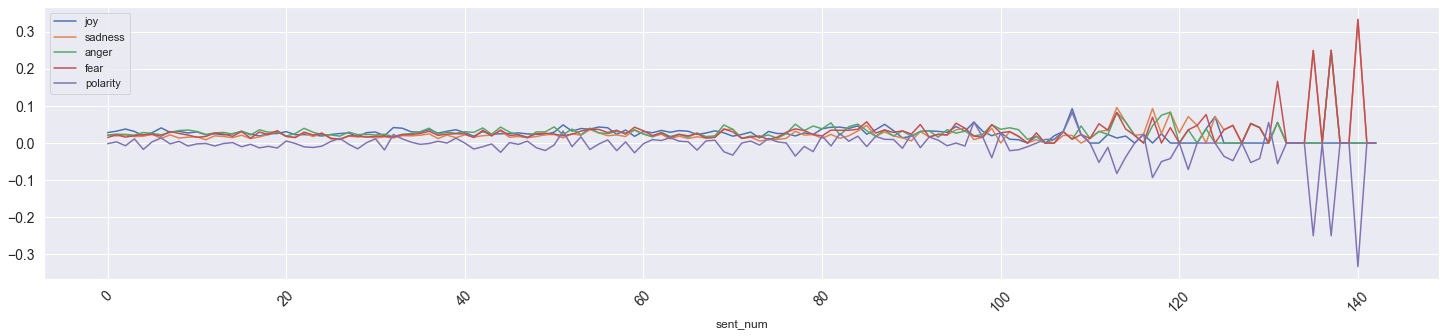

In [28]:
plot_sentiments(RNBHIPHOP_chaps)

<AxesSubplot:xlabel='sent_num'>

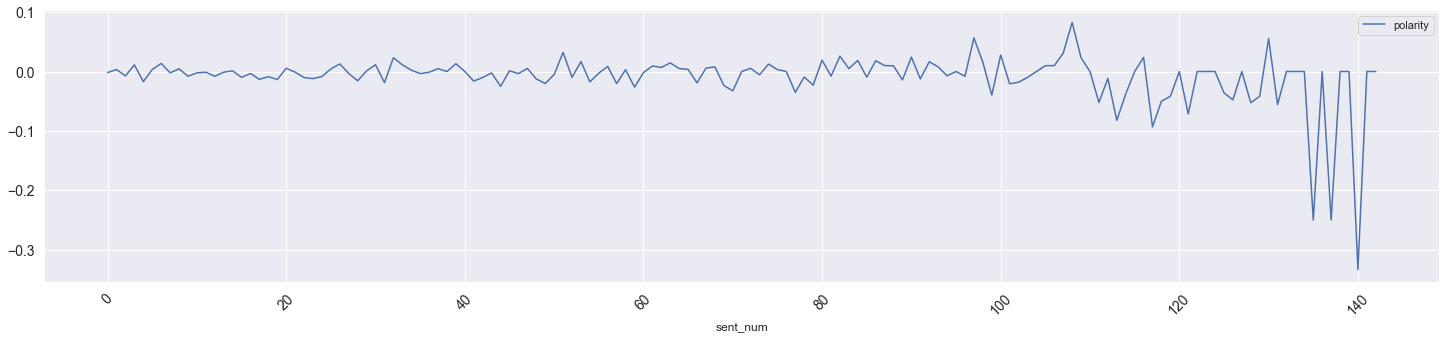

In [29]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
RNBHIPHOP_chaps[['polarity']].plot(**FIG)

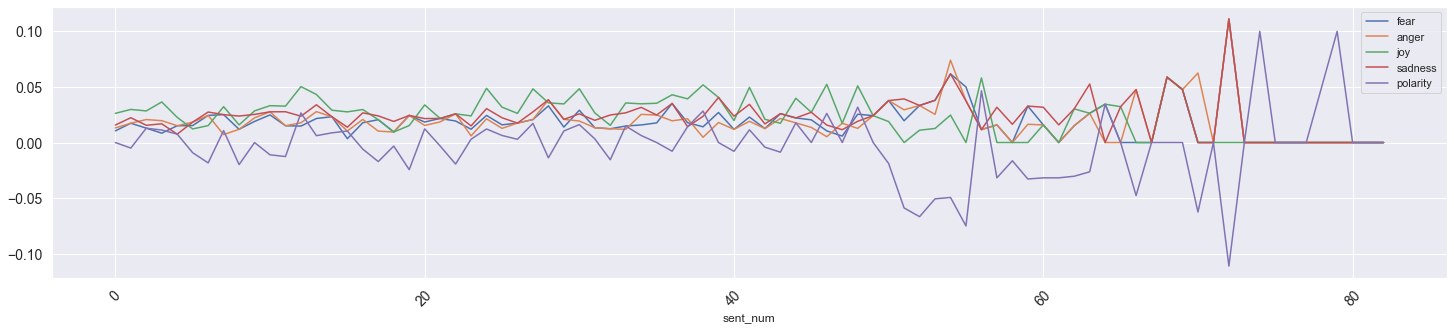

In [30]:
plot_sentiments(COUNTRY_chaps)

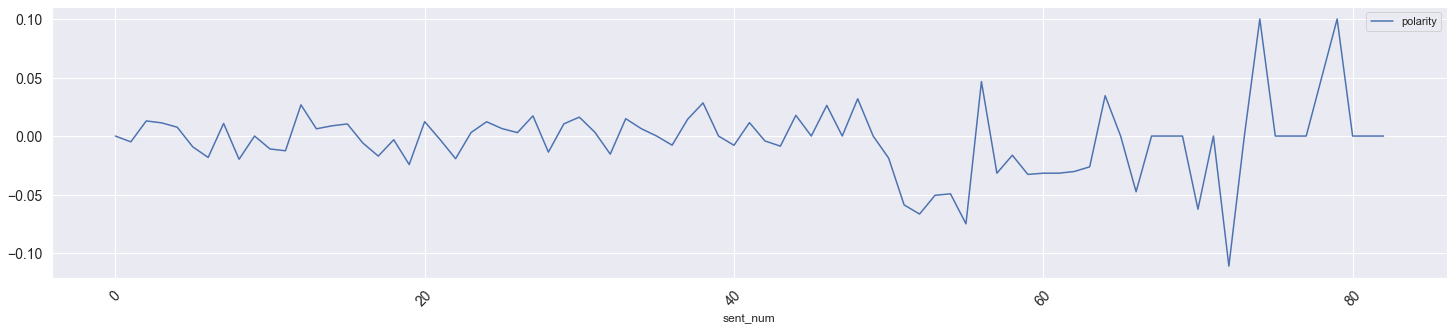

In [31]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
COUNTRY_chaps[['polarity']].plot(**FIG);

# Explore Sentiment in Lyrics

In [32]:
RNBHIPHOP['html'] =  RNBHIPHOP.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
COUNTRY['html'] =  COUNTRY.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
POP['html'] =  POP.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
RAP['html'] =  RAP.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

In [33]:
RNBHIPHOP['html'].head()

sent_num
0      <span class='sent0'>hey</span>
0       <span class='sent0'>oh</span>
0    <span class='sent0'>there</span>
0       <span class='sent0'>it</span>
0       <span class='sent0'>is</span>
Name: html, dtype: object

In [34]:
SENTS = ["artist","title","sent_num"]
RNBHIPHOP_sents = RNBHIPHOP.groupby(SENTS)[emo_cols].mean()
COUNTRY_sents = COUNTRY.groupby(SENTS)[emo_cols].mean()
POP_sents = POP.groupby(SENTS)[emo_cols].mean()
RAP_sents = RAP.groupby(SENTS)[emo_cols].mean()

In [35]:
RNBHIPHOP_sents

anger  anticipation  disgust  \
artist        title                    sent_num                                 
21savage      alot                     0           0.0           0.0      0.0   
                                       1           0.0           0.0      0.0   
                                       2           0.0           0.0      0.0   
                                       3           0.0           0.0      0.0   
                                       4           0.0           0.0      0.0   
...                                                ...           ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70          0.0           0.0      0.0   
                                       71          0.0           0.0      0.0   
                                       72          0.0           0.0      0.0   
                                       73          0.0           0.0      0.5   
                                       74          0.0           0.0      0.0   

                                                 fear       joy  sadness  \
artist        title                    sent_num                            
21savage      alot                     0          0.0  0.333333      0.0   
                                       1          0.0  0.000000      0.0   
                                       2          0.0  0.000000      0.0   
                                       3          0.0  0.000000      0.0   
                                       4          0.0  0.000000      0.0   
...                                               ...       ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70         0.0  0.000000      0.0   
                                       71         0.0  0.000000      0.0   
                                       72         0.0  0.272727      0.0   
                                       73         0.0  0.000000      0.0   
                                       74         0.0  0.000000      0.0   

                                                 surprise     trust  polarity  
artist        title                    sent_num                                
21savage      alot                     0              0.0  0.000000  0.333333  
                                       1              0.0  0.000000  0.000000  
                                       2              0.0  0.000000  0.000000  
                                       3              0.0  0.000000  0.000000  
                                       4              0.0  0.000000  0.000000  
...                                                   ...       ...       ...  
zayhilfigerrr jujuonthatbeat(tzanthem) 70             0.0  0.000000  0.000000  
                                       71             0.0  0.000000  0.000000  
                                       72             0.0  0.272727  0.272727  
                                       73             0.0  0.000000 -0.500000  
                                       74             0.0  0.000000  0.000000  

[7982 rows x 9 columns]

In [36]:
RNBHIPHOP_sents

anger  anticipation  disgust  \
artist        title                    sent_num                                 
21savage      alot                     0           0.0           0.0      0.0   
                                       1           0.0           0.0      0.0   
                                       2           0.0           0.0      0.0   
                                       3           0.0           0.0      0.0   
                                       4           0.0           0.0      0.0   
...                                                ...           ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70          0.0           0.0      0.0   
                                       71          0.0           0.0      0.0   
                                       72          0.0           0.0      0.0   
                                       73          0.0           0.0      0.5   
                                       74          0.0           0.0      0.0   

                                                 fear       joy  sadness  \
artist        title                    sent_num                            
21savage      alot                     0          0.0  0.333333      0.0   
                                       1          0.0  0.000000      0.0   
                                       2          0.0  0.000000      0.0   
                                       3          0.0  0.000000      0.0   
                                       4          0.0  0.000000      0.0   
...                                               ...       ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70         0.0  0.000000      0.0   
                                       71         0.0  0.000000      0.0   
                                       72         0.0  0.272727      0.0   
                                       73         0.0  0.000000      0.0   
                                       74         0.0  0.000000      0.0   

                                                 surprise     trust  polarity  
artist        title                    sent_num                                
21savage      alot                     0              0.0  0.000000  0.333333  
                                       1              0.0  0.000000  0.000000  
                                       2              0.0  0.000000  0.000000  
                                       3              0.0  0.000000  0.000000  
                                       4              0.0  0.000000  0.000000  
...                                                   ...       ...       ...  
zayhilfigerrr jujuonthatbeat(tzanthem) 70             0.0  0.000000  0.000000  
                                       71             0.0  0.000000  0.000000  
                                       72             0.0  0.272727  0.272727  
                                       73             0.0  0.000000 -0.500000  
                                       74             0.0  0.000000  0.000000  

[7982 rows x 9 columns]

In [37]:
RNBHIPHOP_sents['sent_str'] = RNBHIPHOP.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
RNBHIPHOP_sents['html_str'] = RNBHIPHOP.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [38]:
COUNTRY_sents['sent_str'] = COUNTRY.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
COUNTRY_sents['html_str'] = COUNTRY.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [39]:
POP_sents['sent_str'] = POP.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
POP_sents['html_str'] = POP.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [40]:
RAP_sents['sent_str'] = RAP.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
RAP_sents['html_str'] = RAP.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [41]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:
        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [42]:
sample_sentences(RNBHIPHOP_sents)

Sentiment,ID,Sentence
0.0,"('kyle', 'ispy', 87)",i spy i spy with my little eye
-0.25,"('rihanna', 'bitchbetterhavemymoney', 41)",bitch better have my bitch better have my
0.0,"('blocboyjb', 'lookalive', 16)",pushed me to the edge
0.0,"('natalielarose', 'somebody', 29)",tonight is goin up
0.0,"('youngthug', 'hot', 55)",actin like they the ones created this and they get all the drip from my guys
0.0,"('travisscott', 'goosebumps', 42)",when youre not around
0.0,"('xxxtentacion', 'sad!', 31)",you decide if youre ever gonna let me know yeah
0.0,"('offset', 'ricflairdrip', 61)",57 90 split the coupe on my wrist ice
0.1429,"('raesremmurd', 'powerglide', 52)",ive been workin so i cash in
0.0,"('sza', 'lovegalore', 19)",promise i wont cry over spilled milk ooh no i wont


In [43]:
sample_sentences(COUNTRY_sents)

Sentiment,ID,Sentence
0.0,"('lukebryan', 'kickthedustup', 38)",there ain’t nobody
0.0,"('kanebrown', 'belikethat', 58)",there aint no way im moving on
0.0,"('lukecombs', 'eventhoughimleaving', 25)",just close your eyes and say a prayer
0.0,"('lukecombs', 'onenumberaway', 57)",i lied when i said
0.0,"('carlypearce', 'ihopeyourehappynow', 15)",who knew this heart could break this hard
0.0,"('kanebrown', 'homesick', 44)",its like half of me is missin
0.1,"('lukebryan', 'onemargarita', 12)",when that sun lays down well be on our way
0.0,"('dan+shay', 'tequila', 8)",cuttin up the floor in a sorority tshirt
0.0,"('mirandalambert', 'bluebird', 10)",they might keep you waiting
0.25,"('lukecombs', 'doestome', 15)",a damn good brother


In [44]:
sample_sentences(POP_sents)

Sentiment,ID,Sentence
0.0,"('imaginedragons', 'believer', 54)",by the grace of the fire and the flames by the grace of the fire and the flames by the grace of the fire and the flames by the grace of the fire and the flames
0.0,"('justinbieber', 'whatdoyoumean?', 47)",what do you mean dont be so selfish baby yeah yeah oh oh
0.1667,"('charlieputh', 'howlong', 59)",ive been feelin it lately baby
0.0,"('shawnmendes', 'stitches', 6)",but i know that ill make it out alive
0.0,"('adele', 'hello', 26)",its no secret that the both of us
0.0,"('justinbieber', 'yummy', 14)",aint on the side youre number one
-0.1667,"('selenagomez', 'wolves', 16)",ive been crying with the wolves
0.0,"('thechainsmokers', 'paris', 44)",lets show them we are
0.0,"('shawnmendes', 'senorita', 28)",ooh you keep me coming for ya
0.0,"('arianagrande', 'onelasttime', 38)",yeah i know i shouldve fought it


In [45]:
sample_sentences(RAP_sents)

Sentiment,ID,Sentence
0.0,"('kodakblack', 'tunnelvision', 68)",lil kodak they dont like to see you winnin
0.2727,"('fettywap', 'myway', 51)",cause baby you the baddest all this money ima cash it
0.0,"('kevingates', '2phones', 85)",i got two phones one for the bitches and one for the dough
-0.0769,"('bigsean', 'blessings', 17)",i done lost homies who been with me since ed edd n eddy
-0.2,"('migos', 'stirfry', 69)",keep watchin me whip up
0.0,"('postmalone', 'rockstar', 19)",sayin im with the band
-0.125,"('kendricklamar', 'dna.', 74)",sentence on the way killings on the way
-0.1429,"('drake', 'godsplan', 41)",someone watchin this shit close yep close
0.0,"('kevingates', '2phones', 84)",i got two phones one for the plug and one for the load
0.0,"('fettywap', '679', 70)",blowing pluck it out the window


# VADER

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [47]:
RNBHIPHOP_vader_cols = RNBHIPHOP_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
RNBHIPHOP_vader = pd.concat([RNBHIPHOP_sents, RNBHIPHOP_vader_cols], axis=1)

In [48]:
RNBHIPHOP_vader = pd.merge(RNBHIPHOP_vader.reset_index(), LIB, on=["artist","title"])\
    .set_index(["artist","title"]).sort_values(by=['year', "artist"])

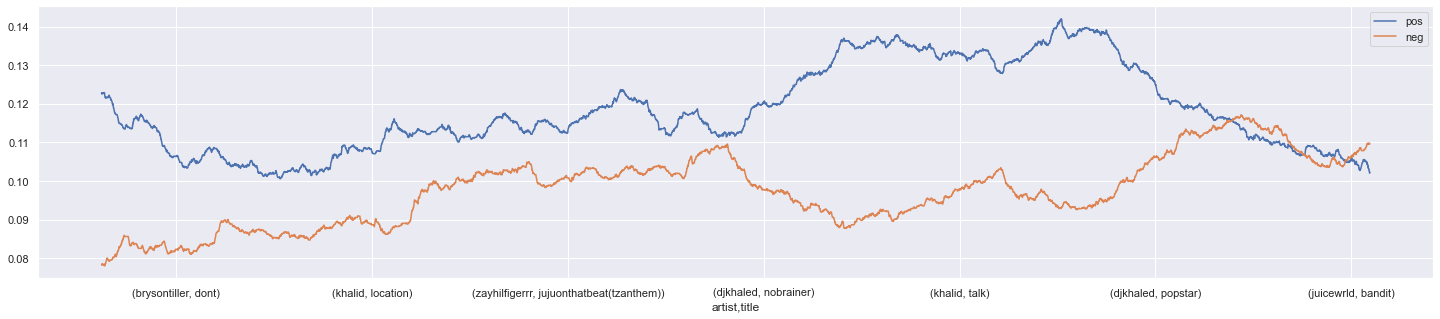

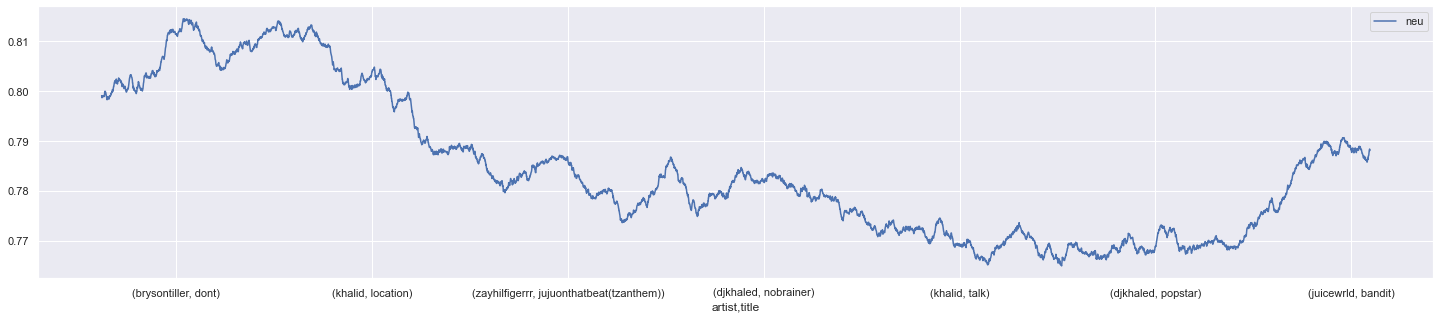

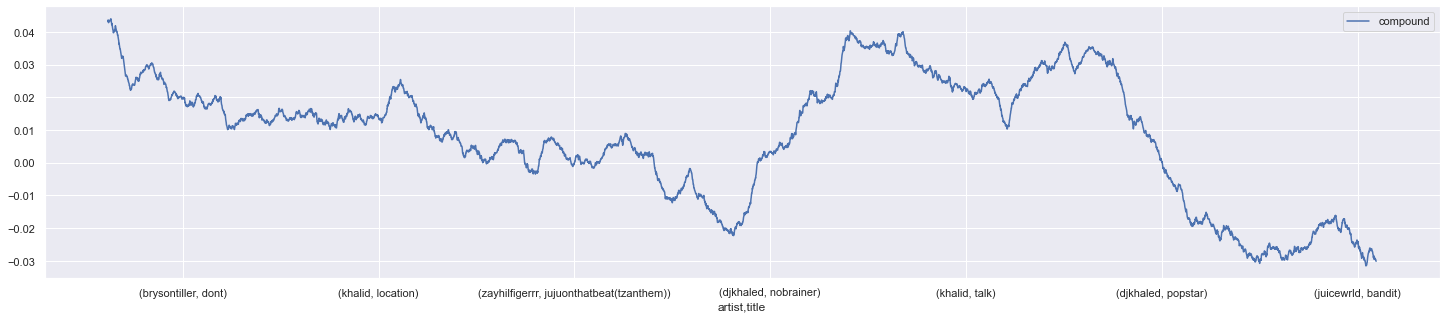

In [49]:
w = int(RNBHIPHOP_vader.shape[0] / 5)
RNBHIPHOP_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
RNBHIPHOP_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
RNBHIPHOP_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

In [50]:
COUNTRY_vader_cols = COUNTRY_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
COUNTRY_vader = pd.concat([COUNTRY_sents, COUNTRY_vader_cols], axis=1)

In [51]:
COUNTRY_vader = pd.merge(COUNTRY_vader.reset_index(), LIB, on=["artist","title"])\
    .set_index(["artist","title"]).sort_values(by=['year', "artist"])

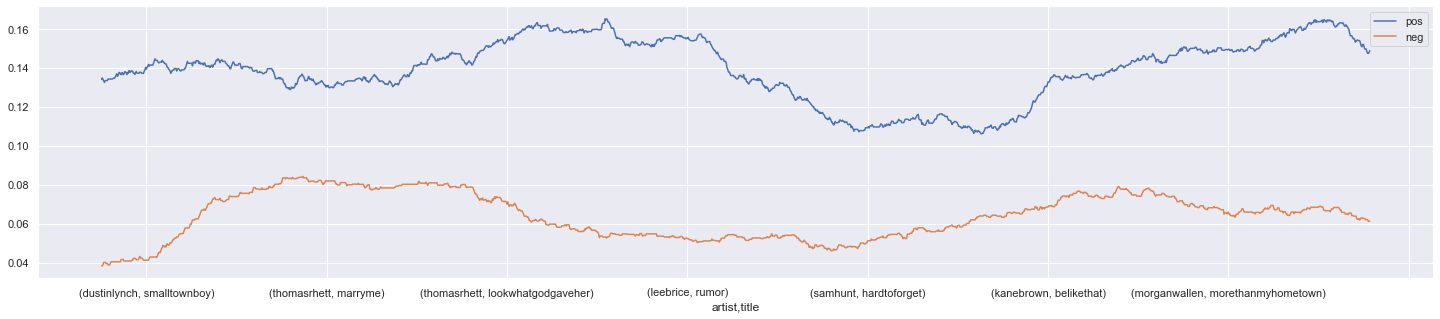

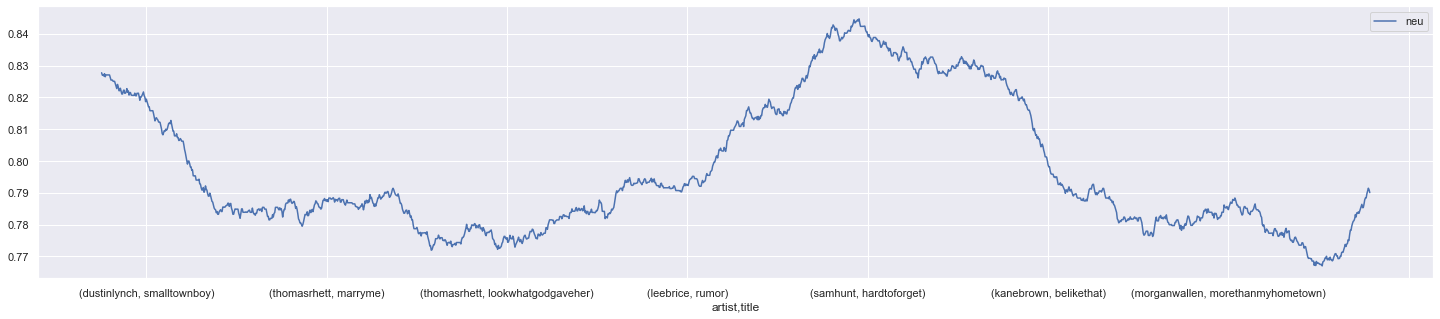

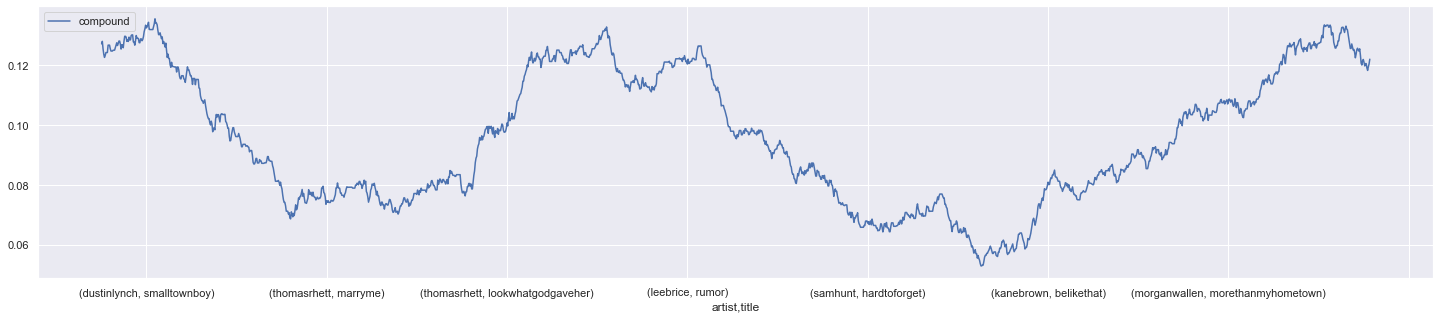

In [52]:
w = int(COUNTRY_vader.shape[0] / 5)
COUNTRY_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
COUNTRY_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
COUNTRY_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

In [53]:
POP_vader_cols = POP_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
POP_vader = pd.concat([POP_sents, POP_vader_cols], axis=1)

In [54]:
POP_vader = pd.merge(POP_vader.reset_index(), LIB, on=["artist","title"])\
    .set_index(["artist","title"]).sort_values(by=['year', "artist"])

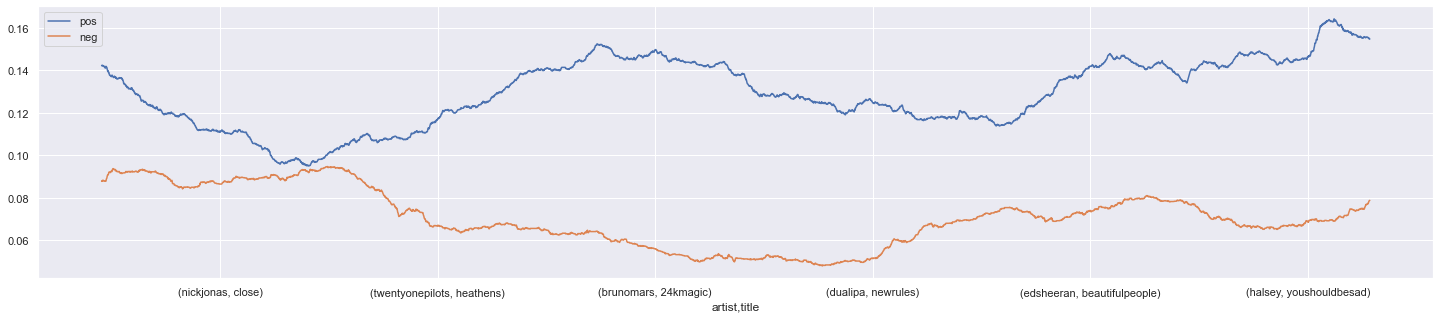

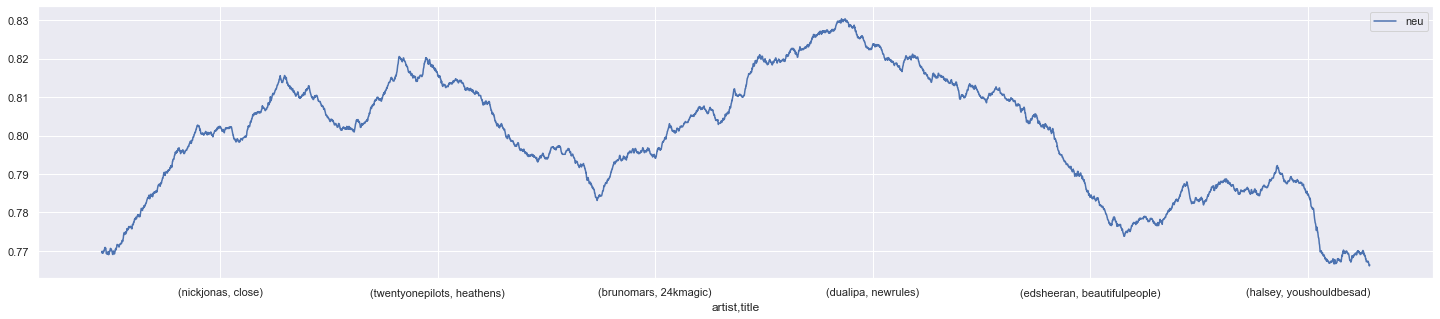

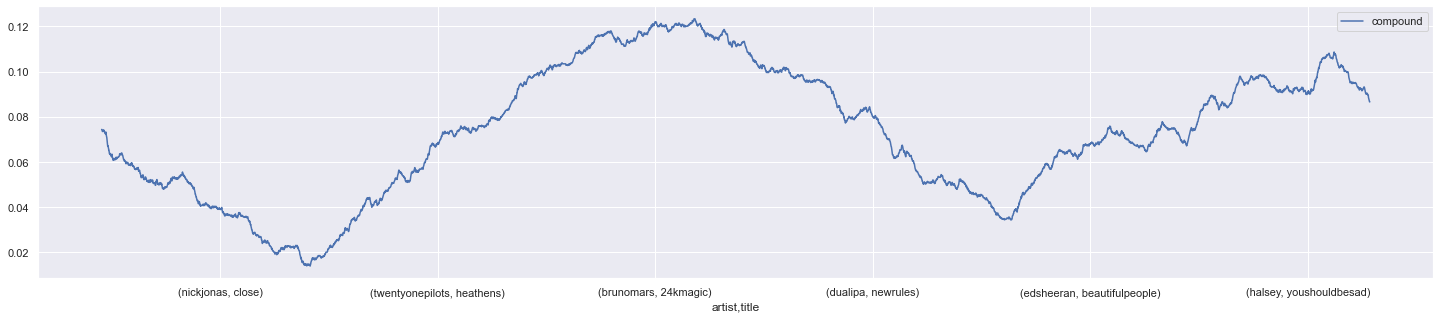

In [55]:
w = int(POP_vader.shape[0] / 5)
POP_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
POP_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
POP_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

In [63]:
RAP_vader_cols = RAP_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
RAP_vader = pd.concat([RAP_sents, RAP_vader_cols], axis=1)

In [64]:
RAP_vader = pd.merge(RAP_vader.reset_index(), LIB, on=["artist","title"])\
    .set_index(["artist","title"]).sort_values(by=['year', "artist"])

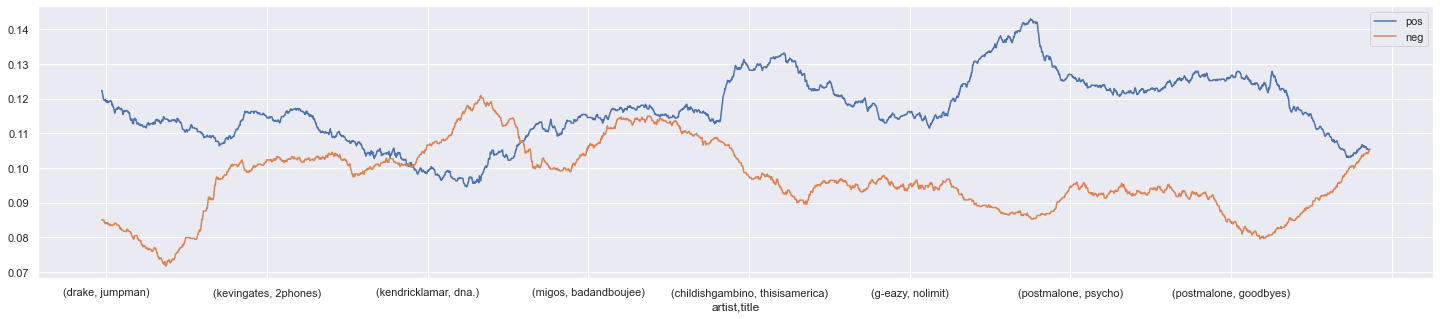

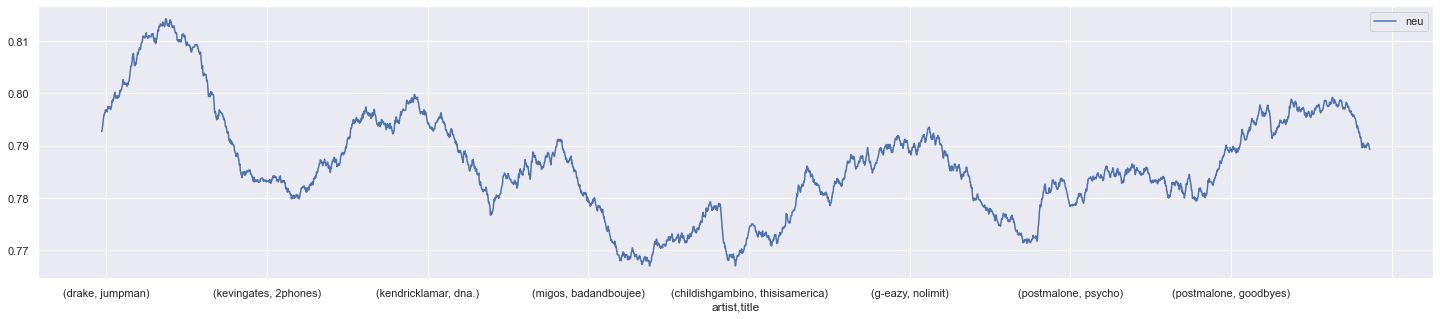

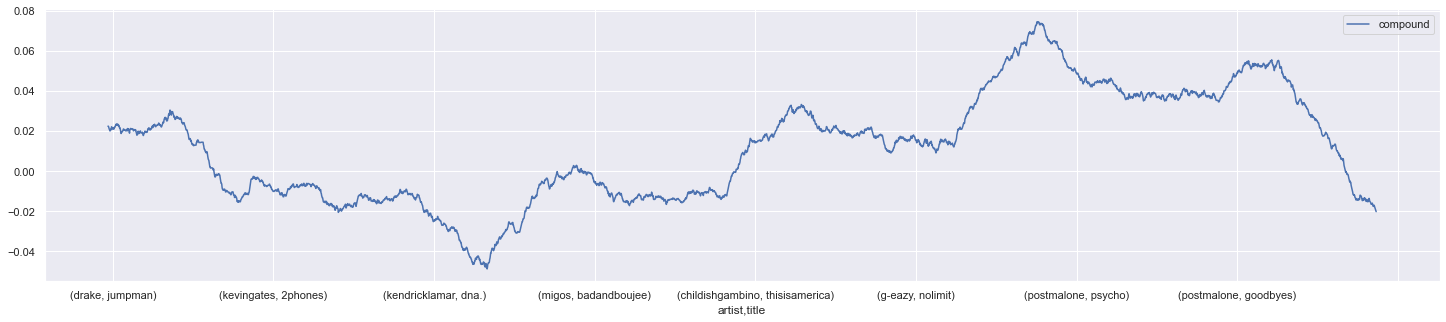

In [66]:
w = int(RAP_vader.shape[0] / 5)
RAP_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
RAP_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
RAP_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));